# QUBO sample mode

We want to write a sample model of the form: 
$$H = -1000\sigma^Z_1\sigma^Z_2-0.1\sigma^Z_2\sigma^Z_3-0.5\sigma^Z_1$$
Using DWave quantum annealer we can embedd the problem using the `BinaryQuadraticModel` function, wher the parameters h and J are given by the embedding (Ising formulation):
$$H = \sum_i h_i \sigma_i + \sum_{i<j} J_{i,j} \sigma_i \sigma_j $$

In [1]:
import dimod

h = {0: 0.5, 1: 0, 2: 0}
J = {(0, 1): 1000., (1, 2): 0.1}

model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)

Let's run it on the simulator:

In [2]:
sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample(model, num_reads=10)

print(response)

   0  1  2  energy num_oc.
1 -1 +1 -1 -1000.6       1
2 -1 +1 -1 -1000.6       1
5 -1 +1 -1 -1000.6       1
8 -1 +1 -1 -1000.6       1
0 +1 -1 +1  -999.6       1
3 +1 -1 +1  -999.6       1
4 +1 -1 +1  -999.6       1
6 +1 -1 +1  -999.6       1
7 +1 -1 +1  -999.6       1
9 +1 -1 +1  -999.6       1
['SPIN', 10 rows, 10 samples, 3 variables]


Unlike in the case of a simple system, you often do not get the ground state. This shows that the problem is also hard for a classical heuristic solver, which is no surprise.

To run it on a real Quantum Annealer we need to embed our graph in the connectivity graph of the hardware, as qubits are often not fully connected. In the case of the D-Wave 2048Q system, the connectivity has the Chimera graph structure:

<img src="./data/unit_cell.png" alt="Unit cell in Chimera graph" style="width: 80px;"/>

We are interested in the chain length of an embedding, which reflects how many physical qubits are used to represent a logical qubit.

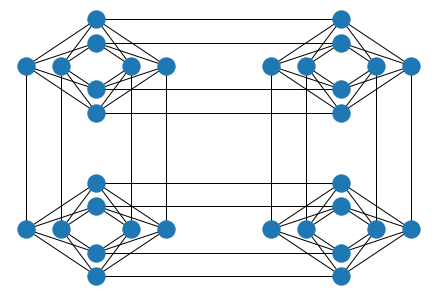

In [3]:
import matplotlib.pyplot as plt
import dwave_networkx as dnx

connectivity_structure = dnx.chimera_graph(2, 2)
dnx.draw_chimera(connectivity_structure)
plt.show()

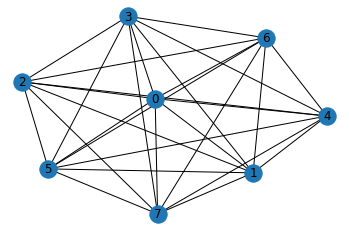

In [4]:
import networkx as nx
G = nx.complete_graph(8)
plt.axis('off') 
nx.draw_networkx(G, with_labels=True)

In [5]:
def get_max_chain_length(dictionary: dict):
    
    if len(dictionary) == 0:
        return 0
    
    index=max(dictionary, key=lambda k: len(dictionary[k]))
    return len(dictionary[index])

def get_max_chain(dictionary: dict):
    
    if len(dictionary) == 0:
        return []
    
    index=max(dictionary, key=lambda k: len(dictionary[k]))
    return dictionary[index]

def get_min_chain(dictionary: dict):
    
    if len(dictionary) == 0:
        return []
    
    index=min(dictionary, key=lambda k: len(dictionary[k]))
    return dictionary[index]

In [6]:
embedded_graph = {0: [1, 12, 4], 1: [30, 11, 27, 87], 2: [28, 9, 25]}
get_max_chain_length(embedded_graph)

4

In [7]:
from minorminer import find_embedding

longest_chain_length  = 0
shortest_chain_length = 200

for i in range(100):
    
    embedding = find_embedding(G, connectivity_structure)

    max_chain_length = get_max_chain_length(embedding)
    
    
    if max_chain_length > longest_chain_length:
        longest_chain = embedding
        longest_chain_length = max_chain_length
        
    if max_chain_length < shortest_chain_length:
        shortest_chain = embedding
        shortest_chain_length = max_chain_length
        
print(longest_chain)
print(shortest_chain)
        

{0: [29, 21], 1: [2, 18], 2: [19, 3, 5], 3: [12, 8, 4, 24], 4: [28, 27, 20], 5: [31, 23, 26], 6: [16, 0, 6], 7: [17, 22, 30]}
{0: [1, 17], 1: [2, 7, 18], 2: [16, 0, 5], 3: [20, 24, 28], 4: [21, 27, 29], 5: [30, 22], 6: [31, 23, 26], 7: [19, 6, 3]}


In [8]:
embedding = find_embedding(G, connectivity_structure)
embedding

{0: [6, 1, 14],
 1: [18, 2],
 2: [19, 3, 20],
 3: [4, 8, 12],
 4: [15, 7],
 5: [27, 11, 31, 23],
 6: [13, 5, 10],
 7: [16, 0, 22]}

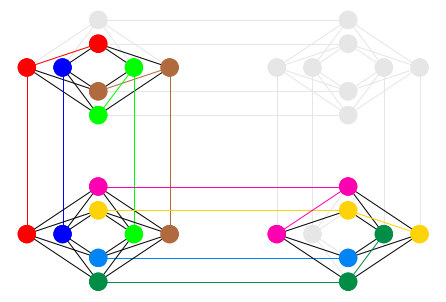

In [9]:
dnx.draw_chimera_embedding(connectivity_structure, shortest_chain)
plt.show()

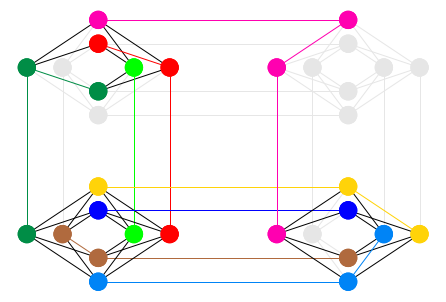

In [10]:
dnx.draw_chimera_embedding(connectivity_structure, longest_chain)
plt.show()

In [11]:
# TO BE ADDED: run on the real annealer

